In [2]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import gmean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools 
import scipy.stats
import statistics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import chi2


In [3]:
def barPlot_func(valueY1, valueY2, varLabels, plot_name):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    ax.set_ylabel('Scores')
    ax.set_title(plot_name)
    r = np.arange(len(varLabels))
    width = 0.30


    ax.bar(r, valueY1, color = 'b',
        width = width,
        label='FBpop_tot')
    ax.bar(r+width, valueY2, color = 'g',
        width = width,
     label='mov_tot')

    plt.xticks(r + width/2, varLabels)
    plt.xticks(rotation=90)
    plt.legend()

    plt.xlabel('Variables')
    plt.ylabel('Target Score')
    plt.show()

    
def barPlot_func_onedata(valueY1, varLabels, plot_name):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    ax.set_ylabel('Scores')
    ax.set_title(plot_name)
    r = np.arange(len(varLabels))
    width = 0.75


    ax.bar(r, valueY1, color = 'b',
        width = width,
        )

    plt.xticks(r + width/2, varLabels)
    plt.xticks(rotation=90)

    plt.xlabel('Variables')
    plt.ylabel('Dispersion Ratio')
    plt.show()


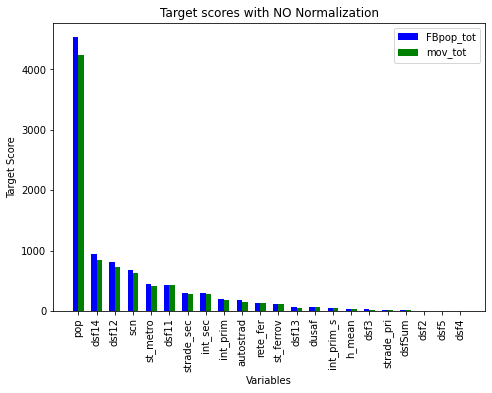

pop :  4541.665152953366 4241.502190786856
dusaf :  61.05894417039538 60.776113578391204
rete_fer :  128.53911054394658 134.08383565042624
autostrad :  177.46454116606057 152.7932857413662
strade_pri :  22.816601628428156 20.74439381960717
strade_sec :  293.03078569056464 286.33753506512505
h_mean :  34.268510712225 29.73588481448038
st_ferrov :  115.23012436605293 120.52619700888447
st_metro :  451.228056567337 416.6162636802894
int_prim :  207.31758085114322 185.8356523305428
int_prim_s :  50.70754846204993 45.45244340780959
int_sec :  292.8743176065695 284.65655774141817
scn :  677.8965528572893 634.6979111288053
dsf11 :  434.2013272014979 428.5981444874152
dsf12 :  804.9191354289368 726.3633076461292
dsf13 :  66.64323887089849 58.10814743224894
dsf14 :  950.514583763638 849.4282077834754
dsf2 :  1.5746470261013807 1.0054197132256497
dsf3 :  27.001993182076784 24.83550041533921
dsf4 :  0.0011945627027073137 0.0004022269943864843
dsf5 :  0.7483622209663434 0.7149061616937952
dsfSum :

In [4]:
#read data from csv 
data = pd.read_csv('table.csv')

langs = ['pop', 'dusaf', 'rete_fer', 'autostrad', 
                                 'strade_pri', 'strade_sec', 'h_mean','st_ferrov',
                                 'st_metro','int_prim','int_prim_s','int_sec','scn','dsf11',
                                 'dsf12','dsf13','dsf14','dsf2','dsf3','dsf4','dsf5','dsfSum']


# preprocessing of data before Regression Feature Selection
X  = pd.DataFrame(data, columns = langs)
y1 = pd.DataFrame(data, columns= ['FBpop_tot'])
y2 = pd.DataFrame(data, columns= ['mov_tot'])


y1 = y1.values.ravel()
y2 = y2.values.ravel()


X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.33, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.33, random_state=1)


# define feature selection
fs1 = SelectKBest(score_func=f_regression, k='all')
fs2 = SelectKBest(score_func=f_regression, k='all')


# learn relationship from training data 
fs1.fit(X_train1, y_train1)
fs2.fit(X_train2, y_train2)

# transform train input data
X_train_fs1 = fs1.transform(X_train1)
X_train_fs2 = fs2.transform(X_train2)

# transform test input data
X_test_fs1 = fs1.transform(X_test1)
X_test_fs2 = fs2.transform(X_test2)

plot_data = pd.DataFrame({"FBpop_tot":fs1.scores_,
                  "mov_tot":fs2.scores_,
                  "target_variables": langs})

plot_data= plot_data.sort_values(by=['FBpop_tot'], ascending=False)


barPlot_func(plot_data.FBpop_tot, plot_data.mov_tot, plot_data.target_variables,'Target scores with NO Normalization')

for i in range(len(X.columns)):
    print(X.columns[i],': ',fs1.scores_[i], fs2.scores_[i])





In [5]:


normalized_X = preprocessing.normalize(X)


a = pd.DataFrame(normalized_X, columns=langs)


X_train1, X_test1, y_train1, y_test1 = train_test_split(normalized_X, y1, test_size=0.33, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(normalized_X, y2, test_size=0.33, random_state=1)


# define feature selection
fs1 = SelectKBest(score_func=f_regression, k='all')
fs2 = SelectKBest(score_func=f_regression, k='all')


# learn relationship from training data 
fs1.fit(X_train1, y_train1)
fs2.fit(X_train2, y_train2)

# transform train input data
X_train_fs1 = fs1.transform(X_train1)
X_train_fs2 = fs2.transform(X_train2)

# transform test input data
X_test_fs1 = fs1.transform(X_test1)
X_test_fs2 = fs2.transform(X_test2)


plot_data = pd.DataFrame({"FBpop_tot":fs1.scores_,
                  "mov_tot":fs2.scores_,
                  "target_variables": langs})


plot_data= plot_data.sort_values(by=['FBpop_tot'], ascending=False)


barPlot_func(plot_data.FBpop_tot, plot_data.mov_tot, plot_data.target_variables,'Target scores with Normalization')


for i in range(len(X.columns)):
    print(X.columns[i],': ',fs1.scores_[i], fs2.scores_[i])



    

ValueError: Expected 2D array, got 1D array instead:
array=[6.81222413e+02 5.68844200e+02 6.45345700e+02 2.34390194e+02
 5.51082022e-01 9.70102058e-01 1.19205851e+01 0.00000000e+00
 2.68673804e+01 2.70601543e-01 1.06221954e+02 1.13613542e+00
 2.12242208e+02 1.90156855e+00 7.66891366e+02 5.33475222e+02
 4.11251769e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.74636885e+02 1.14633647e+00 8.67006853e+02 2.98628455e+02
 2.75035769e+02 5.58923539e+02 1.51524930e+01 9.35219298e+02
 2.66376005e+02 1.35611060e+03 1.51083382e+03 1.75364343e+03
 1.12533256e+03 6.47189829e+02 0.00000000e+00 0.00000000e+00
 1.15517247e+02 2.20224652e+02 0.00000000e+00 6.11898190e+01
 1.30642411e+02 2.51272985e+02 2.00599961e+03 1.37743718e+03
 1.24866640e+03 5.66275111e+02 8.90291038e+02 1.04124181e+03
 1.10482030e+02 1.51709807e+02 0.00000000e+00 5.67766435e+01
 1.73840275e+02 0.00000000e+00 1.87622763e+00 0.00000000e+00
 2.23828626e+02 1.29519024e+03 3.51615505e+01 1.24977643e+02
 6.64139493e+00 0.00000000e+00 6.44963413e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.74740975e+02 0.00000000e+00
 5.20406844e+01 9.46256766e+01 1.46180890e+02 8.34193109e+02
 3.49197879e+01 0.00000000e+00 6.78959063e+02 6.82428105e+00
 0.00000000e+00 2.34952611e+02 7.08571694e+01 4.57398257e+02
 1.41594962e+02 4.49409070e+01 1.31459750e+01 0.00000000e+00
 3.79153927e+02 7.16345055e-01 6.45581991e+02 2.02621207e+02
 1.25059887e+02 1.03686748e+02 1.93515548e+02 1.29586976e+03
 2.88693603e+03 1.13232053e+03 2.12841682e+02 1.11147247e+02
 7.30129672e+02 8.56289067e+02 7.84626888e+01 6.81425834e+01
 6.37188589e+02 2.62857622e+02 5.47476111e+02 2.77992275e+02
 3.45652899e+01 3.32415813e+02 2.99360192e+02 2.56069608e+02
 3.88145849e+02 7.19588266e+02 4.86816349e+01 6.03970843e+02
 1.10475469e+02 0.00000000e+00 1.33958468e+02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.78601635e-01 1.73076082e+02
 4.44251397e+01 0.00000000e+00 0.00000000e+00 1.29207809e+03
 1.33039872e+03 3.46505216e+03 4.45523637e+03 1.80495342e+03
 2.60319585e+03 2.40688234e+03 4.46291147e+03 3.73121909e+03
 9.55958803e+02 3.57203198e+03 8.12646055e+03 3.68518111e+03
 1.29685287e+03 3.13131178e+03 1.29515596e+03 3.13538384e+03
 2.74066948e+03 7.22928874e+03 5.90865348e+03 1.61255628e+03
 8.86794054e+02 7.43729947e+03 4.07790349e+03 2.51933512e+03
 4.15770063e+03 3.36571774e+03 4.68541042e+03 4.57394314e+03
 4.46153013e+03 3.79429511e+03 9.91526999e+03 2.90436068e+03
 7.71937441e+03 1.20034172e+04 8.83833040e+03 8.42378534e+03
 6.84555538e+03 9.96114002e+03 1.36887904e+04 8.87642615e+03
 1.09795277e+04 1.50282013e+04 8.61993492e+03 1.77360868e+04
 2.07308219e+04 1.02014548e+04 1.32402022e+04 1.58967529e+04
 2.07390302e+04 1.19148374e+03 1.42034296e+03 1.19685293e+03
 1.21884233e+03 6.27084864e+02 3.55766038e+02 5.61962967e+02
 6.84908236e+02 7.64804586e+02 1.24980699e+03 1.63550986e+03
 2.88577008e+03 1.81144301e+03 1.40675196e+03 6.34195791e+03
 3.70658445e+03 1.77359137e+01 2.02550347e+00 8.36427602e+01
 1.56186942e+02 2.16174374e+01 5.41343940e+01 2.03299594e+02
 6.08908996e+01 1.95662761e+02 1.96430370e+02 5.76821886e+02
 9.65489932e+02 3.27518124e+02 1.31980138e+02 7.41361890e+02
 5.11268790e+02 6.32992818e+03 6.02491362e+03 9.42676592e+03
 7.73731973e+03 5.63740256e+03 5.06666060e+03 5.48877623e+03
 5.55727784e+03 2.13739422e+04 1.32541976e+04 3.23140826e+04
 2.74817388e+04 9.29225938e+03 8.75335034e+03 1.31893061e+04
 9.87445971e+03 1.73609650e+03 2.15977482e+03 5.15266574e+03
 9.65675743e+03 1.65817007e+03 2.50424518e+03 9.98763982e+03
 4.96870525e+03 9.29102642e+03 1.88774642e+04 9.91934029e+03
 1.08659584e+04 1.71696559e+04 8.14658531e+03 5.54242551e+03
 5.08900590e+03 2.51904727e+03 4.72829360e+03 3.44381701e+03
 7.89767500e+02 1.27135252e+03 1.24701996e+03 8.34827857e+03
 1.51485626e+04 6.17252374e+03 1.19053852e+04 1.96851344e+04
 3.09046802e+04 1.58787273e+04 4.90139709e+04 2.55711167e+03
 6.93356927e+03 3.11598558e+03 3.89585961e+03 7.68309021e+03
 4.14107291e+04 3.79728777e+03 7.54324585e+03 1.90212226e+03
 1.14506729e+03 7.78075037e+02 4.29345822e+02 8.02095330e+02
 2.45146730e+03 9.00347246e+02 2.58580292e+03 1.32112993e+03
 4.30431133e+02 7.06620905e+02 4.46141741e+02 4.21333091e+02
 6.61298091e+02 9.84383269e+02 8.80366926e+03 2.77529359e+03
 2.09419981e+03 1.13738165e+03 4.05473311e+03 4.44510941e+03
 1.49619516e+03 3.21235800e+03 9.86970447e+02 2.08935277e+03
 7.40971837e+02 1.35983264e+03 1.42878644e+03 3.82744557e+03
 8.56375075e+02 2.01856098e+03 5.50569956e+04 4.75243847e+04
 1.12138012e+05 5.20445082e+04 1.96895271e+04 1.09436367e+04
 1.69130318e+04 7.80294867e+03 7.19610174e+04 2.96848034e+04
 1.78639255e+04 1.03454066e+04 9.32960456e+03 3.91869431e+03
 8.26042294e+03 3.09852310e+03 9.37102760e+03 7.02918222e+03
 4.79122904e+03 6.00374082e+03 4.29709552e+03 3.78621428e+03
 3.80068422e+03 3.24118477e+03 2.93914584e+03 2.70065869e+03
 3.34236508e+03 4.48270046e+03 2.15615096e+03 1.06763767e+03
 5.30322380e+03 1.30526357e+03 4.26740986e+03 4.39800618e+03
 4.01793325e+03 2.72498095e+03 4.50745650e+03 5.63392929e+03
 3.29152978e+03 3.53246393e+03 9.73133020e+03 3.07101675e+03
 1.84068659e+03 1.50582960e+03 2.45144055e+03 2.43683378e+03
 1.27519433e+03 1.34644758e+03 5.40196014e+03 1.74312815e+03
 2.50113402e+03 1.13107544e+03 1.96183348e+03 1.68578622e+03
 1.02282926e+03 9.24385527e+02 2.20275382e+03 3.09027181e+03
 7.67250779e+02 1.50572783e+03 2.72649869e+03 1.23286105e+03
 2.10286570e+03 6.75745833e+02 0.00000000e+00 5.91124215e+01
 9.60291423e+01 1.48450703e+02 1.43694999e+00 0.00000000e+00
 2.85426791e+02 2.88097152e+02 6.38438403e+02 9.23901375e+02
 1.31753231e+03 1.41643717e+03 6.18330550e+02 1.45031024e+03
 1.42190626e+03 3.66267529e+03 3.53588400e+01 7.83588480e+02
 6.85840046e+02 1.33377683e+03 2.07134397e+02 0.00000000e+00
 1.34046241e+02 0.00000000e+00 2.79721474e+03 8.87819806e+02
 8.01645047e+02 4.03277207e+01 1.30038293e+00 0.00000000e+00
 3.44221441e+00 1.75884309e+02 2.72126142e+03 1.15262585e+03
 2.30937417e+03 8.92680042e+02 2.64120668e+03 1.38003178e+03
 1.05216182e+03 9.30302389e+02 4.67034084e+03 4.14874625e+03
 7.08805724e+03 5.99440748e+03 2.07089703e+03 2.94319245e+03
 4.84938609e+03 5.55320313e+03 4.52880630e+02 2.17139640e+02
 9.05455987e+02 3.66372018e+02 7.50676984e+01 4.64802558e+02
 5.26871983e+02 3.03192940e+02 4.02174638e+03 1.12593907e+03
 6.42560726e+03 1.53912697e+03 1.29617484e+03 8.05058196e+02
 2.26358724e+03 3.10349672e+03 1.14086738e+02 5.46086312e+02
 1.96657676e+03 1.19974716e+02 4.41755831e+01 1.08977818e+00
 2.05427656e+02 5.50644277e+02 3.35345938e+02 6.86994154e+02
 5.58227361e+02 4.97404519e+02 1.75255430e+03 9.67818085e+02
 3.64357114e+02 3.99049451e+03 6.63810302e+03 3.09868598e+03
 3.73356080e+03 6.38342816e+03 1.24520750e+04 3.69530647e+03
 8.29805086e+03 2.22825788e+03 1.83789970e+03 1.10222176e+03
 1.45121749e+03 2.25125749e+03 3.32135202e+03 1.60927998e+03
 2.67453877e+03 1.96418668e+04 4.05294687e+03 1.02366268e+04
 6.24122857e+03 3.50323206e+03 3.21746202e+03 4.17627474e+03
 4.73694078e+03 3.82798171e+03 2.71129347e+03 2.12065582e+03
 1.68534091e+03 4.42229649e+03 3.87507118e+03 3.25787199e+03
 3.73555257e+03 1.51243136e+03 1.21942328e+03 7.93756618e+02
 9.36653591e+02 1.97756535e+03 1.71922489e+03 1.32731408e+03
 1.15232016e+03 9.32404694e+02 2.75405554e+03 8.76242427e+02
 5.36042970e+03 2.70167728e+03 1.41276500e+03 6.61068909e+03
 1.29502630e+03 1.56552961e+03 1.33589307e+03 1.23399227e+03
 1.17447125e+03 1.45972561e+03 2.52456574e+03 1.66109249e+03
 1.14844286e+03 5.59272085e+02 6.96176036e+02 3.96761766e+02
 7.37480218e+02 9.67829663e+02 5.96872790e+02 9.81404077e+02
 1.01497626e+03 1.20617901e+03 1.36960130e+03 2.56928800e+03
 1.31578188e+03 3.36050041e+03 3.37211923e+03 1.42051782e+03
 1.58225378e+03 1.43316386e+03 1.53469244e+03 7.74101056e+02
 1.34852268e+03 1.84319579e+03 2.81922048e+03 2.23839354e+03
 1.48922197e+03 9.51395344e+02 1.33724236e+03 6.94110551e+02
 1.35693155e+03 6.62653154e+03 4.11601571e+03 5.86978959e+03
 2.70886611e+03 1.36188459e+03 1.26632883e+03 1.72852728e+03
 9.58287055e+02 8.14894876e+02 9.15226259e+02 5.82520963e+02
 8.42492187e+02 4.73714950e+02 2.76267938e+03 5.64540628e+02
 6.10395458e+02 7.87380843e+02 8.76468189e+02 1.90517886e+03
 9.02531365e+02 1.67759892e+03 5.17560497e+03 2.09342965e+03
 2.29283555e+03 7.24088043e+02 5.55293680e+02 3.89190219e+02
 2.26879488e+02 1.47127975e+03 3.54637814e+03 9.06916063e+02
 9.91619092e+02 1.61748225e+03 2.78599776e+03 8.79436883e+02
 2.81643753e+02 2.98476277e+02 2.43480264e+02 2.49724484e+02
 3.84231461e+02 3.06911012e+01 1.42680044e+03 5.03278278e+03
 1.29370864e+04 1.57281931e+03 4.49187737e+02 1.17587667e+02
 1.00777831e+00 2.31862117e+00 1.43959679e+02 3.12194295e+02
 0.00000000e+00 0.00000000e+00 3.31970900e+01 1.15111100e+03
 6.70763439e+02 4.72997931e+02 4.25255822e+02 6.21374973e+02
 6.27867902e+02 7.44022725e+02 8.41885591e+02 7.11706588e+02
 2.05278216e+03 1.13746499e+03 1.98481457e+03 3.08353210e+03
 6.05707421e+02 5.86916722e+02 4.75340408e+02 1.20808298e+03
 1.39364971e+03 9.62105344e+02 3.18475174e+03 1.29130172e+03
 1.72859953e+03 2.65488310e+03 1.93637152e+03 2.15012150e+03
 1.08515990e+03 8.06330692e+02 9.24151641e+02 8.37249955e+02
 1.44951512e+03 1.04109171e+03 1.47001533e+03 5.49758438e+02
 1.42752230e+03 1.53758643e+03 9.12710490e+02 3.80728518e+02
 7.96172795e+02 1.35551038e+03 7.06147188e+02 3.89473282e+02
 5.20320814e+02 7.35703211e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
pearson1 = []
spearman1 = []
kendall1 = []
pearson2 = []
spearman2 = []
kendall2 = []

for (columnName, columnData) in X.iteritems():
    pearson1.append(scipy.stats.pearsonr(columnData, y1)[0]) # Pearson index
    spearman1.append(scipy.stats.spearmanr(columnData, y1)[0])          # Spearman's rho
    kendall1.append(scipy.stats.kendalltau(columnData, y1)[0])         # Kendall's tau
    pearson2.append(scipy.stats.pearsonr(columnData, y2)[0]) # Pearson index
    spearman2.append(scipy.stats.spearmanr(columnData, y2)[0])          # Spearman's rho
    kendall2.append(scipy.stats.kendalltau(columnData, y2)[0])         # Kendall's tau


plot_dataP = pd.DataFrame({"FBpop_tot":pearson1,
                  "mov_tot":pearson2,
                  "target_variables": langs})

plot_dataS = pd.DataFrame({"FBpop_tot":spearman1,
                  "mov_tot":spearman2,
                  "target_variables": langs})
plot_dataK = pd.DataFrame({"FBpop_tot":kendall1,
                  "mov_tot":kendall2,
                  "target_variables": langs})


barPlot_func(plot_dataP.FBpop_tot, plot_dataP.mov_tot, plot_dataP.target_variables,'Pearson index correlation')
for i in range(len(langs)):
    print(langs[i], ': ', plot_dataP.FBpop_tot[i],plot_dataP.mov_tot[i])


barPlot_func(plot_dataS.FBpop_tot, plot_dataS.mov_tot, plot_dataS.target_variables,'Spearman rho correlation ')
for i in range(len(langs)):
    print(langs[i], ': ', plot_dataP.FBpop_tot[i],plot_dataP.mov_tot[i])

barPlot_func(plot_dataK.FBpop_tot, plot_dataK.mov_tot, plot_dataK.target_variables,'Kendall tau correlation')
for i in range(len(langs)):
    print(langs[i], ': ', plot_dataP.FBpop_tot[i],plot_dataP.mov_tot[i])




pearson1 = []
spearman1 = []
kendall1 = []
pearson2 = []
spearman2 = []
kendall2 = []

for (columnName, columnData) in a.iteritems():
    pearson1.append(scipy.stats.pearsonr(columnData, y1)[0]) # Pearson index
    spearman1.append(scipy.stats.spearmanr(columnData, y1)[0])          # Spearman's rho
    kendall1.append(scipy.stats.kendalltau(columnData, y1)[0])         # Kendall's tau
    pearson2.append(scipy.stats.pearsonr(columnData, y2)[0]) # Pearson index
    spearman2.append(scipy.stats.spearmanr(columnData, y2)[0])          # Spearman's rho
    kendall2.append(scipy.stats.kendalltau(columnData, y2)[0])         # Kendall's tau


plot_dataP = pd.DataFrame({"FBpop_tot":pearson1,
                  "mov_tot":pearson2,
                  "target_variables": langs})

plot_dataS = pd.DataFrame({"FBpop_tot":spearman1,
                  "mov_tot":spearman2,
                  "target_variables": langs})
plot_dataK = pd.DataFrame({"FBpop_tot":kendall1,
                  "mov_tot":kendall2,
                  "target_variables": langs})


barPlot_func(plot_dataP.FBpop_tot, plot_dataP.mov_tot, plot_dataP.target_variables,'Pearson index correlation')
for i in range(len(langs)):
    print(langs[i], ': ', plot_dataP.FBpop_tot[i],plot_dataP.mov_tot[i])


barPlot_func(plot_dataS.FBpop_tot, plot_dataS.mov_tot, plot_dataS.target_variables,'Spearman rho correlation ')
for i in range(len(langs)):
    print(langs[i], ': ', plot_dataP.FBpop_tot[i],plot_dataP.mov_tot[i])

barPlot_func(plot_dataK.FBpop_tot, plot_dataK.mov_tot, plot_dataK.target_variables,'Kendall tau correlation')
for i in range(len(langs)):
    print(langs[i], ': ', plot_dataP.FBpop_tot[i],plot_dataP.mov_tot[i])






In [ ]:
dispersion_ratio = []

for (columnName, columnData) in X.iteritems():
    x_new = [i for i in columnData if i != 0]
    dispersion_ratio.append(statistics.mean(x_new)/gmean(x_new))

barPlot_func_onedata(dispersion_ratio, langs,'Dispersion Ratio for each variable')

for i in range(len(langs)):
    print(langs[i], ': ', dispersion_ratio[i])

In [ ]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
# define the model
model1 = RandomForestRegressor()
model2 = RandomForestRegressor()

# fit the model
model1.fit(X, y1)
model2.fit(X, y2)

# get importance
importance = model1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(langs[i], ': ', '%.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

importance = model2.feature_importances_

print('\n')
for i,v in enumerate(importance):
    print(langs[i], ': ', '%.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()



# fit the model
model1.fit(a, y1)
model2.fit(a, y2)

# get importance
importance = model1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(langs[i], ': ', '%.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

importance = model2.feature_importances_

print('\n')
for i,v in enumerate(importance):
    print(langs[i], ': ', '%.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance, label='prova')
pyplot.show()
